# 지식iN 데이터 워드 클라우드로 그리기

# 20201234 홍길동

In [1]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [2]:
# 시간이 오래 소요됩니다! 

from tqdm.notebook import tqdm

tmp_list = [] 

for i in tqdm(range(1, 50)):
    url = "https://kin.naver.com/search/list.nhn?query=%EB%B9%BC%EB%B9%BC%EB%A1%9C+%EB%8D%B0%EC%9D%B4&page="+str(i)
    html = urlopen(url)

    soup = BeautifulSoup(html.read(), "html.parser")

    docs = soup.find("ul", {"class": "basic1"}).find_all("li")


    for doc in docs:
        ans = doc.find_all("dd")[1]
        tmp_list.append(ans.text.strip())

    time.sleep(0.5)
    
print(len(tmp_list))


490


In [3]:
from konlpy.tag import Okt
okt = Okt()

In [4]:
ko_doc = '\n'.join(tmp_list)
print(ko_doc[:1000])

빼빼로와 빼빼로데이 라는 단어는 특정기업의 상표권등록이 되어있는것으로 알고있습니다. 그런데 빼빼로데이라는 단어는 식품이 아닌 다른 제품에(예를들면 볼펜류) 상표권...
빼빼로 데이 때 빼빼로랑 같이 선물을 할까하는데 좋은게... 다가오는 빼빼로데이 준비하시느라 고민이 참 많으시겠어요~! 저도 이번에 빼빼로데이 준비하면서 이것 저것...
작년에 남편한테 빼빼로데이선물로 스킨,로션,에센스... 올해 빼빼로데이선물은 올인원 제품으로 할까하는데... 부탁드려요  빼빼로데이선물 할 시즌이 다가 오긴 하네요.ㅎㅎ...
부산에 있는 남자친구 회사에 빼빼로데이에 맞춰... 지인들에게도 추천드리는 빼빼로데이선물 BEST... 러블리 로즈베어 빼빼로6개입 빼빼로선물세트 빼빼로데이, 2....
빼빼로 데이에 친구들은 저에게 수제 빼빼로를 만들어준다고 하는데 저도 친구들처럼... 빼빼로 데이에 친구들에게 선물하면 괜찮은 수제 빼빼로를 몇 가지 링크 걸어드릴 테니...
빼빼로데이 회사선물 추천부탁드립니다.. 빼빼로느낌나게 길다란 무언가였으면... 빼빼로데이에는 역시 빼빼로가 짱입니다.. 아몬드 빼빼로 40개 3만원대 보러가기 > https...
빼빼로데이때 저는 남친 줄려고 선물세트를 한박스 샀는데 남자친구는 만약에 빼빼로... 굳이 빼빼로데이 때 빼빼로 갯수로 마음을 확인하지 않으셨으면 좋겠습니다^^
작년에 남편한테 빼빼로데이선물로 스킨,로션,에센스... 올해 빼빼로데이선물은 올인원 제품으로 할까하는데... 40대라 탄력이나 보습이 좋은 걸로 빼빼로데이선물 부탁드려요...
제가 빼빼로 데이때 빼빼로를 직접 만들려고 하는데 이 초콜릿 이랑 초코펜이 같이 파는 곳인데 송파구에 있는 곳 아시나요? 안녕하세요 ~~~ 어디서 파는지 찾지 마시고 ~~ 아래...
제가 회사 막내라 빼빼로 데이에 상사와 직원분들께 선물하려는데 뭐가 좋을까요?  막내시면 간단하게 빼빼로만 돌리려수 충분하실거 같아요~ 만들면 더 좋지만...
안녕하세요 빼빼로 데이 5일전 빼빼로 사려고 하는 여학생 입니다. 제가 편

In [5]:
print(len(ko_doc))

45197


In [6]:
import time

start = time.time()
ko_doc_noun = okt.nouns(ko_doc)
print(time.time()-start)

10.551321506500244


In [7]:
from collections import Counter

count_noun = Counter(ko_doc_noun)

In [8]:
count_noun.most_common(20)

[('빼빼로데이', 787),
 ('빼빼로', 509),
 ('선물', 418),
 ('데이', 236),
 ('때', 146),
 ('요', 93),
 ('추천', 88),
 ('제', 87),
 ('여자친구', 84),
 ('남자친구', 72),
 ('날', 71),
 ('저', 62),
 ('친구', 55),
 ('이번', 50),
 ('좀', 49),
 ('세트', 47),
 ('것', 46),
 ('남친', 42),
 ('뭐', 42),
 ('그냥', 42)]

In [9]:
stopword_list = ['빼빼로데이', '빼빼로', '데이']

for word in count_noun:
    if len(word) == 1:
        stopword_list.append(word)
        
stopword_list[-5:]

['효', '샤', '년', '겹', '기']

In [10]:
# stopword 단어를 모두 pop()

for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

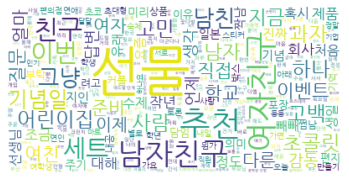

In [11]:
from wordcloud import WordCloud

# mac OS: '/Library/Fonts/NanumBarunGothic.ttf'
wc_noun = WordCloud(background_color='white', max_words=2000, 
                     font_path=r'C:\Windows\Fonts\NanumGothic.ttf')
wc_noun = wc_noun.generate_from_frequencies(count_noun)

import matplotlib.pyplot as plt
plt.imshow(wc_noun, interpolation="bilinear")
plt.axis("off")
plt.show()